Data shape: (95662, 16)

Data types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Numerical summary:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000

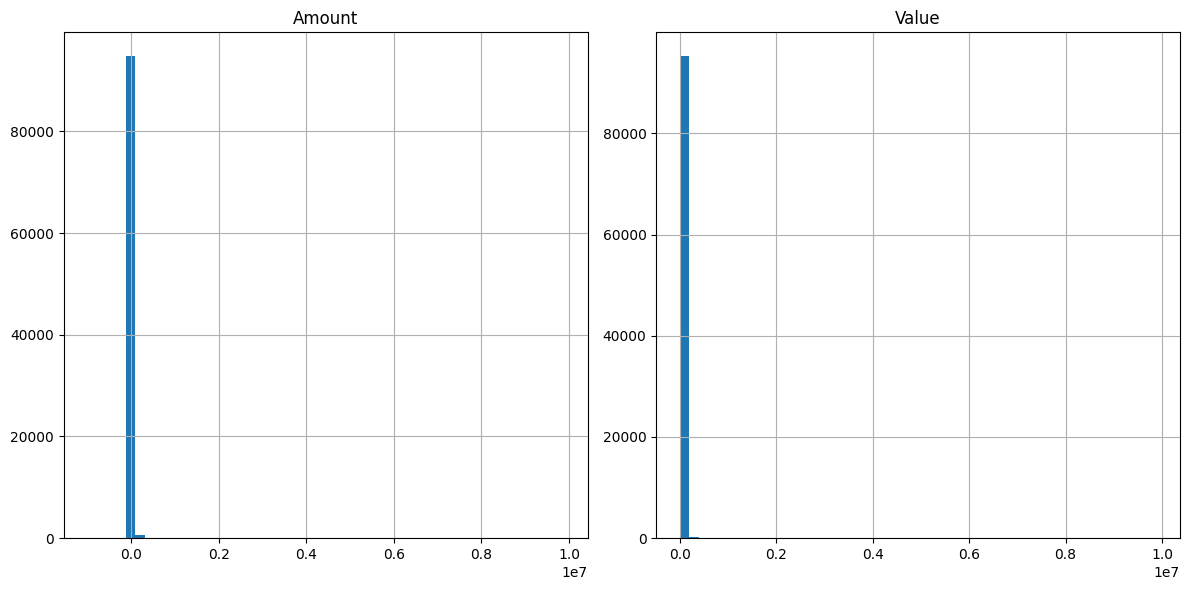

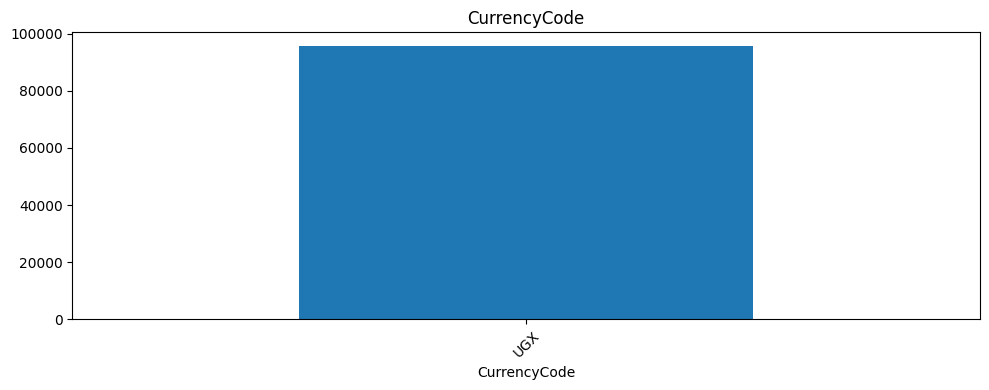

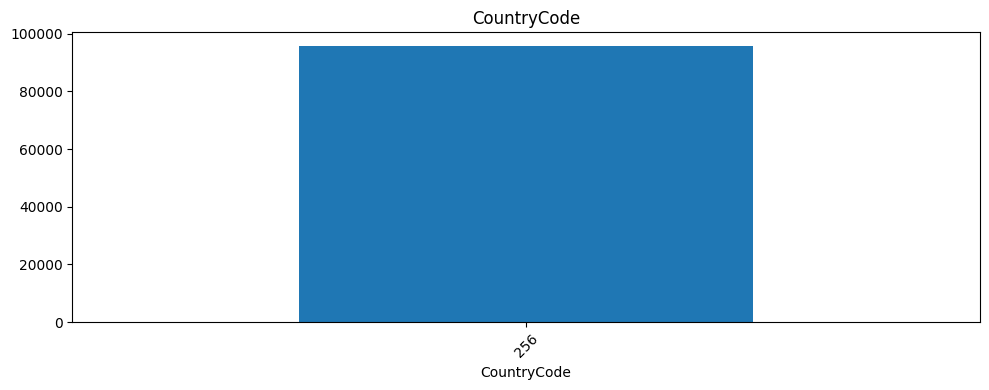

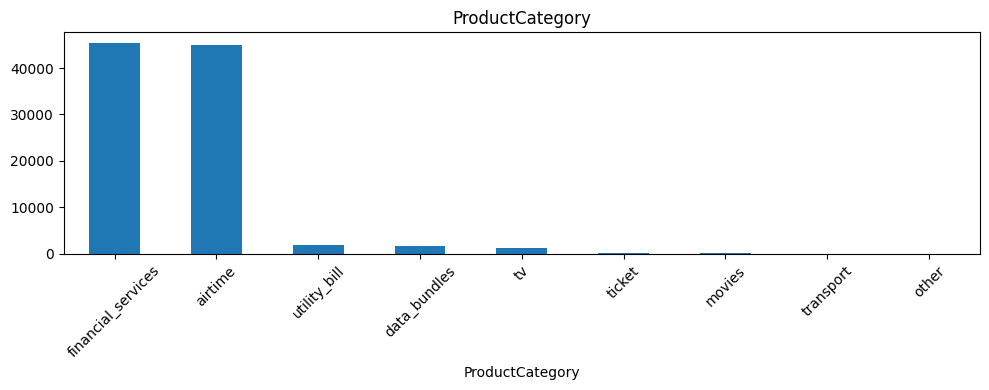

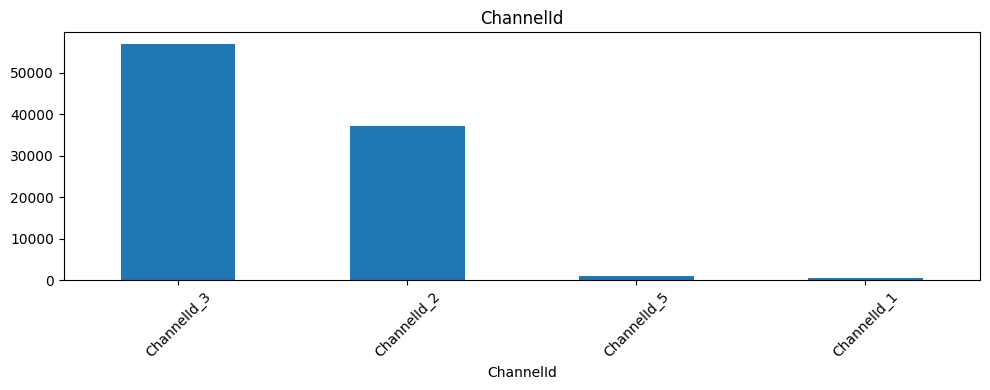

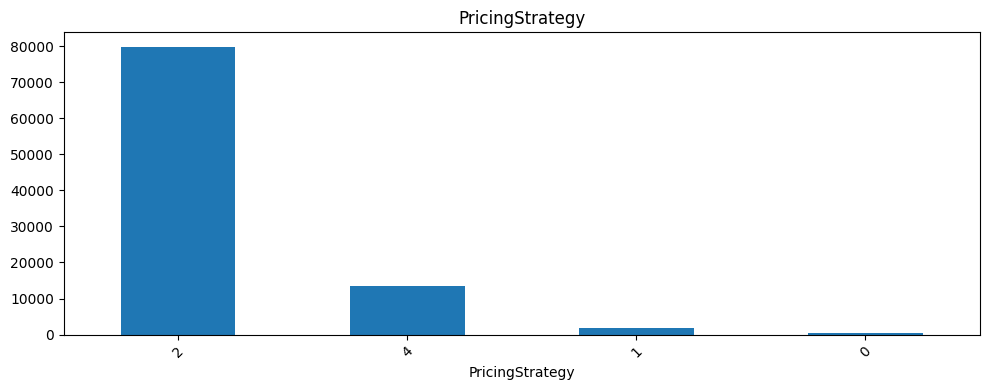

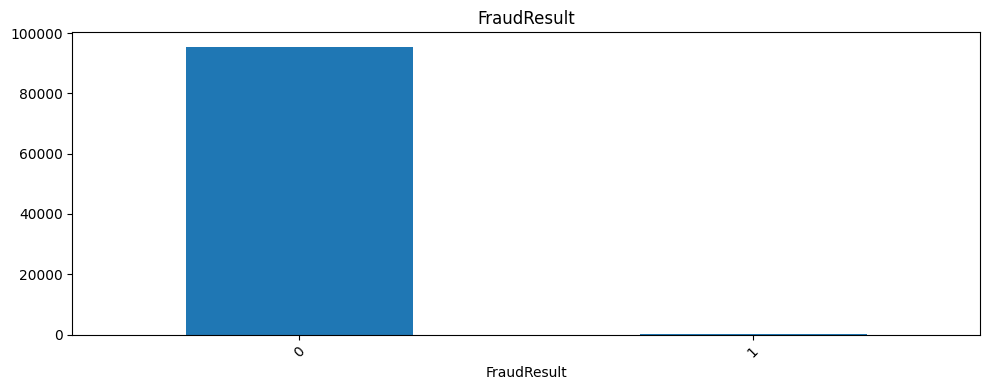

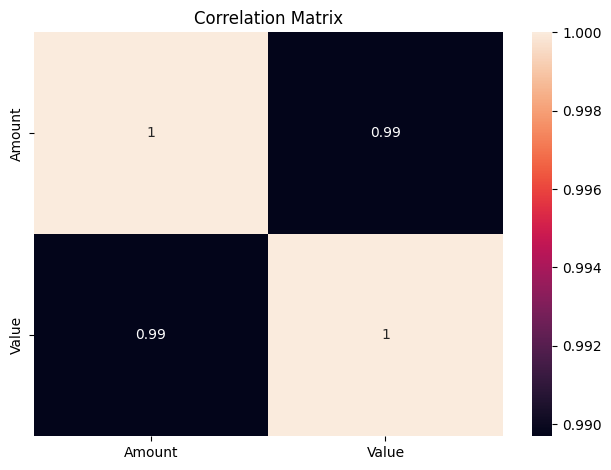

No missing values found in any columns.


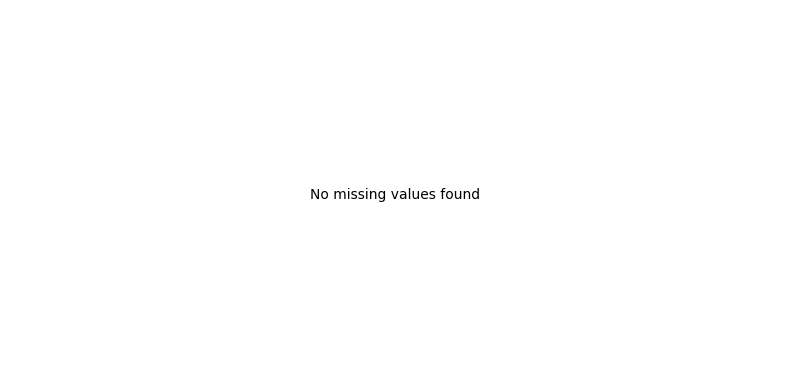

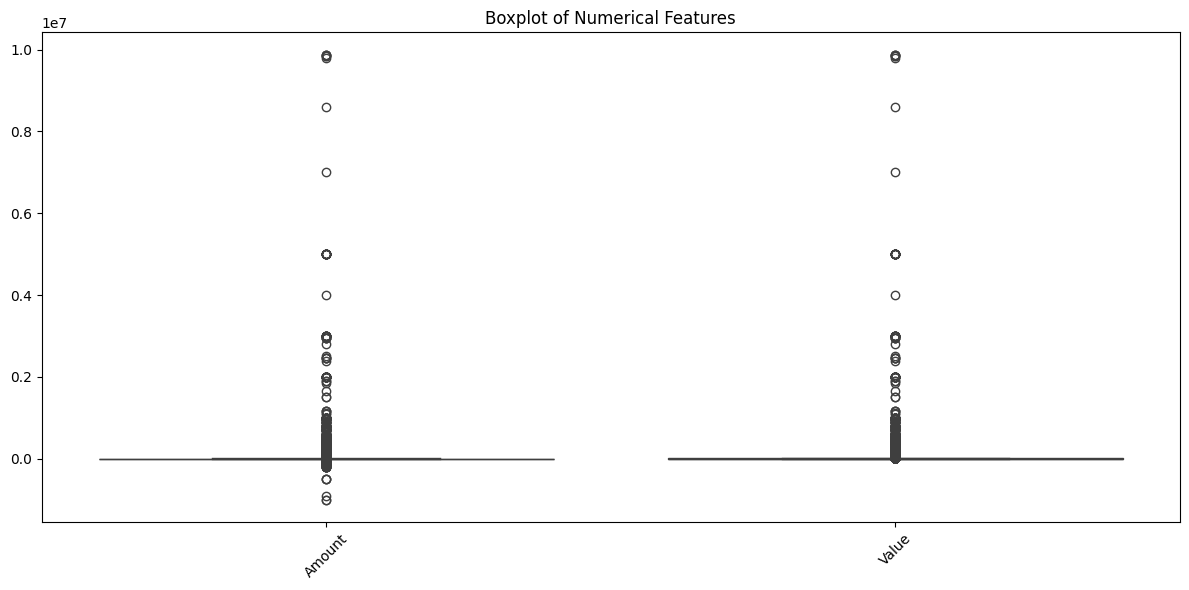

EDA completed and processed data saved.


In [2]:
# Import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Create directories if they don't exist
os.makedirs('../data/processed', exist_ok=True)


# Load data (place the dataset in data/raw/)
df = pd.read_csv('../data/data.csv')

# 1. Overview
print("Data shape:", df.shape)
print("\nData types:\n", df.dtypes)

# 2. Summary statistics
print("\nNumerical summary:\n", df.describe())
print("\nCategorical summary:\n", df.describe(include=['object']))

# 3. Distribution of numerical features
num_cols = ['Amount', 'Value']
df[num_cols].hist(bins=50, figsize=(12, 6))
plt.tight_layout()
plt.savefig('../data/processed/numerical_distributions.png')
plt.show()

# 4. Distribution of categorical features
cat_cols = ['CurrencyCode', 'CountryCode', 'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'../data/processed/{col}_distribution.png')
    plt.show()

# 5. Correlation analysis
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../data/processed/correlation_matrix.png')
plt.show()

# 6. Missing values analysis
missing = df.isnull().sum()/len(df)*100
missing = missing[missing > 0]

if len(missing) > 0:
    missing.sort_values(inplace=True)
    missing.plot.bar(figsize=(8, 4))
    plt.title('Percentage of Missing Values by Column')
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.savefig('../data/processed/missing_values.png')
    plt.show()
else:
    print("No missing values found in any columns.")
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, 'No missing values found', 
             ha='center', va='center')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('../data/processed/missing_values.png')
    plt.show()

# 7. Outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../data/processed/outliers_boxplot.png')
plt.show()

# 8. Time analysis
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day
df['TransactionMonth'] = df['TransactionStartTime'].dt.month
df['TransactionYear'] = df['TransactionStartTime'].dt.year

# Save processed data for feature engineering
df.to_csv('../data/processed/transactions_processed.csv', index=False)

print("EDA completed and processed data saved.")

---

### Key EDA Insights

Based on the analysis performed, here are the most critical insights that will guide subsequent feature engineering and modeling steps:

* **Extreme Class Imbalance:** The `FraudResult` target variable shows severe imbalance, with fraudulent transactions (1) being a very small minority. This necessitates specific strategies for model training and evaluation to prevent bias towards the majority class.
* **Highly Skewed Numerical Features & Outliers:** 'Amount' and 'Value' are both extremely right-skewed and contain numerous outliers. Transformations (e.g., log-scaling) will likely be essential to normalize their distributions and ensure robust model performance.
* **Strong Collinearity between 'Amount' and 'Value':** These two features are almost perfectly correlated ($\rho = 0.99$). This suggests potential redundancy; careful consideration will be needed on whether to use both, one, or a derived feature to avoid multicollinearity issues.
* **Dominant Categorical Categories:** Features like `CurrencyCode`, `CountryCode`, and `PricingStrategy` are heavily dominated by a single category. While this simplifies their representation, it also means these features might offer limited discriminatory power unless fraud patterns are concentrated within the less frequent categories.
* **Complete Data (No Missing Values):** A significant positive finding is the absence of any missing values across all columns, simplifying the data cleaning phase.

---